In [1]:
import sys; sys.path.append("../resources/")
from infercnv_utils import *
import pandas as pd
# make this notebook work better with Scanpy
import warnings; warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
# make output directories
import os
if not os.path.exists("scRNA_out"):
    os.mkdir("scRNA_out")

if not os.path.exists("scRNA_out/infercnv/"):
    os.mkdir("scRNA_out/infercnv/")

In [3]:
sc.set_figure_params(transparent=True, dpi_save=400)
sc.settings.figdir = "scRNA_out/infercnv/"

---
# Read in data

In [3]:
a_comb = sc.read("../data/scRNA/VUMC_COMBINED.h5ad"); a_comb

AnnData object with n_obs × n_vars = 22638 × 16464
    obs: 'HTAN Specimen ID', 'Cell_Type', 'Tumor_Type', 'Compartment', 'Patient'
    var: 'n_cells', 'gene_id', 'chromosome', 'start', 'end'
    obsm: 'X_pca', 'X_umap'

In [4]:
a = a_comb[a_comb.obs.Patient != "", :].copy() ; a

AnnData object with n_obs × n_vars = 6914 × 16464
    obs: 'HTAN Specimen ID', 'Cell_Type', 'Tumor_Type', 'Compartment', 'Patient'
    var: 'n_cells', 'gene_id', 'chromosome', 'start', 'end'
    obsm: 'X_pca', 'X_umap'

In [5]:
# read in results from previous run
# read in CNV matrix and put in a.obsm slot
tmp = np.load("../step1/scRNA_out/infercnv/VUMC_cnv.npz", allow_pickle="TRUE")
a.obsm["X_cnv"] = tmp.f.arr_0.item()
# read in CNV genomic partitions
a.uns["cnv"] = np.load("../step1/scRNA_out/infercnv/uns_cnv_VUMC.npy", allow_pickle="TRUE").item()
# read in cnv_score and cnv_leiden
a.obs = a.obs.merge(
    pd.read_csv("../step1/scRNA_out/infercnv/VUMC_cnv_leiden.csv", index_col=0),
    left_index=True,
    right_index=True
)

In [6]:
a.obs.cnv_leiden = a.obs.cnv_leiden.astype(str)
a.obs.cnv_leiden = a.obs.cnv_leiden.astype("category")

---
## PAT71397

         Falling back to preprocessing with `sc.pp.pca` and default params.
categories: 0, 1, 10, etc.
var_group_labels: chr1, chr2, chr3, etc.


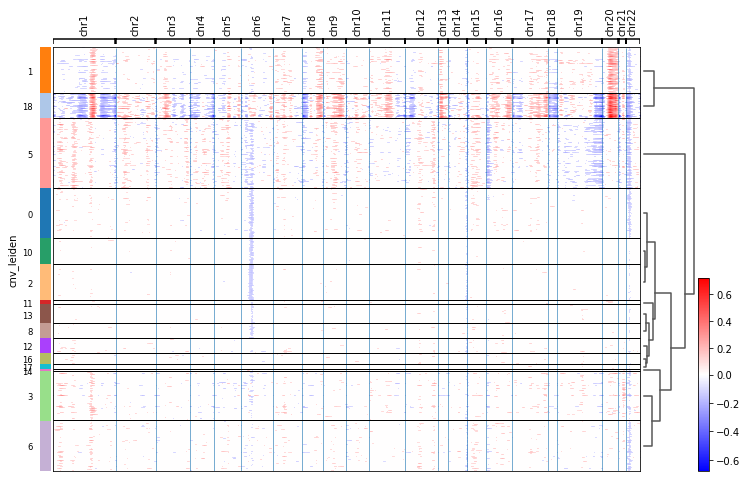

In [7]:
cnv.pl.chromosome_heatmap(
    a[a.obs["Patient"]=="PAT71397",:],
    groupby="cnv_leiden",
    dendrogram=True,
    figsize=(12,8),
)

In [8]:
# define dictionary to remap cnv_leiden
d = {
    "5":"1",
    "1":"2A",
    "18":"2B",
}

pat = "PAT71397"

Mapping new 'CNV clone' values into adata.obs
Plotting CNV heatmap with 'CNV clone' clusters for PAT71397
         Falling back to preprocessing with `sc.pp.pca` and default params.
categories: 1, 2A, 2B, etc.
var_group_labels: chr1, chr2, chr3, etc.


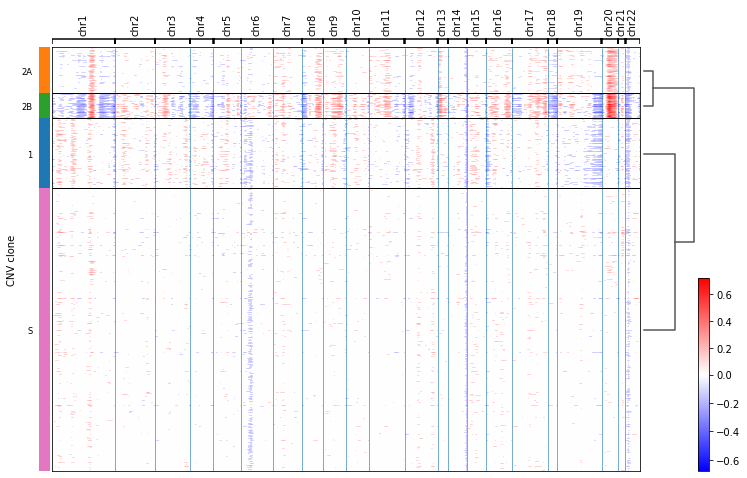

In [9]:
curate_cnv_scRNA(adata=a, pat=pat, d=d, infercnv_dir="scRNA_out/infercnv/")

---
## PAT71662

         Falling back to preprocessing with `sc.pp.pca` and default params.
categories: 0, 1, 10, etc.
var_group_labels: chr1, chr2, chr3, etc.


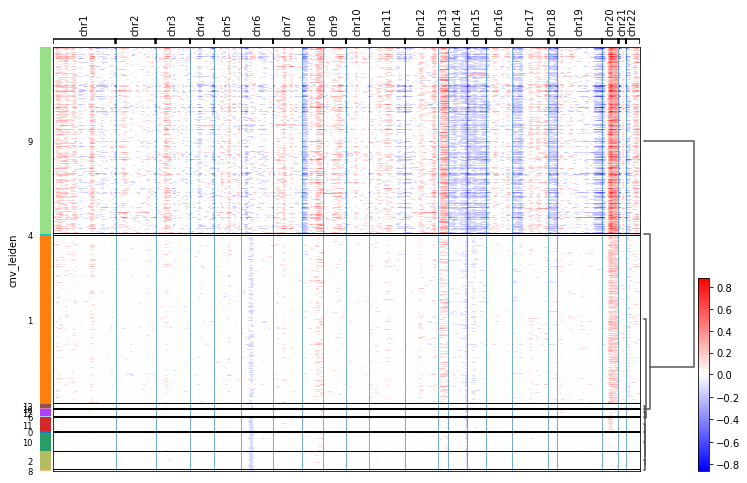

In [10]:
cnv.pl.chromosome_heatmap(
    a[a.obs["Patient"]=="PAT71662",:],
    groupby="cnv_leiden",
    dendrogram=True,
    figsize=(12,8),
)

In [11]:
# define dictionary to remap cnv_leiden
d = {
    "1":"1A",
    "9":"1B",
}

pat = "PAT71662"

Mapping new 'CNV clone' values into adata.obs
Plotting CNV heatmap with 'CNV clone' clusters for PAT71662
         Falling back to preprocessing with `sc.pp.pca` and default params.
categories: 1A, 1B, S
var_group_labels: chr1, chr2, chr3, etc.


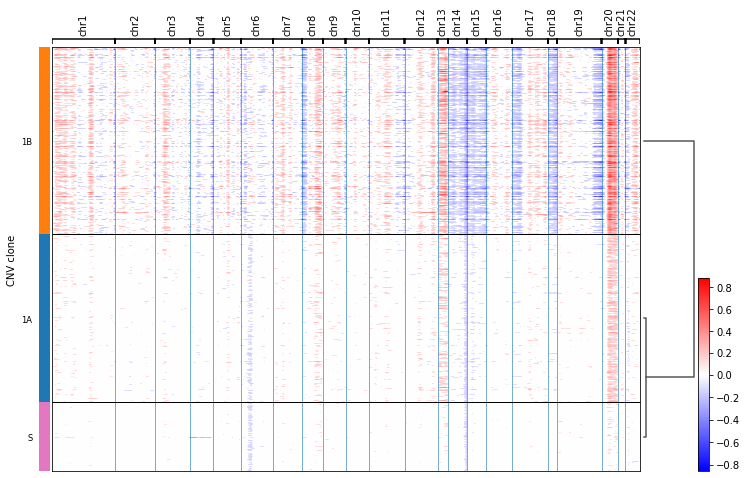

In [12]:
curate_cnv_scRNA(adata=a, pat=pat, d=d, infercnv_dir="scRNA_out/infercnv/")

---
## PAT73899

         Falling back to preprocessing with `sc.pp.pca` and default params.
categories: 1, 10, 11, etc.
var_group_labels: chr1, chr2, chr3, etc.


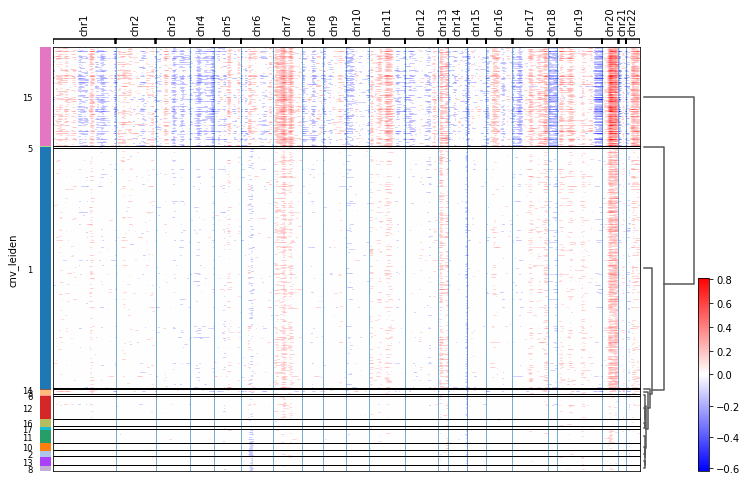

In [13]:
cnv.pl.chromosome_heatmap(
    a[a.obs["Patient"]=="PAT73899",:],
    groupby="cnv_leiden",
    dendrogram=True,
    figsize=(12,8),
)

In [14]:
# define dictionary to remap cnv_leiden
d = {
    "1":"1A",
    "15":"1B",
}

pat = "PAT73899"

Mapping new 'CNV clone' values into adata.obs
Plotting CNV heatmap with 'CNV clone' clusters for PAT73899
         Falling back to preprocessing with `sc.pp.pca` and default params.
categories: 1A, 1B, S
var_group_labels: chr1, chr2, chr3, etc.


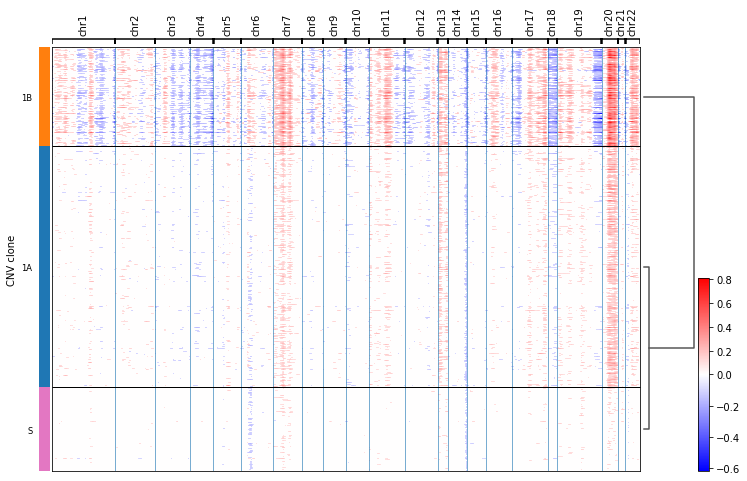

In [15]:
curate_cnv_scRNA(adata=a, pat=pat, d=d, infercnv_dir="scRNA_out/infercnv/")

---
## PAT74143

         Falling back to preprocessing with `sc.pp.pca` and default params.
categories: 0, 1, 10, etc.
var_group_labels: chr1, chr2, chr3, etc.


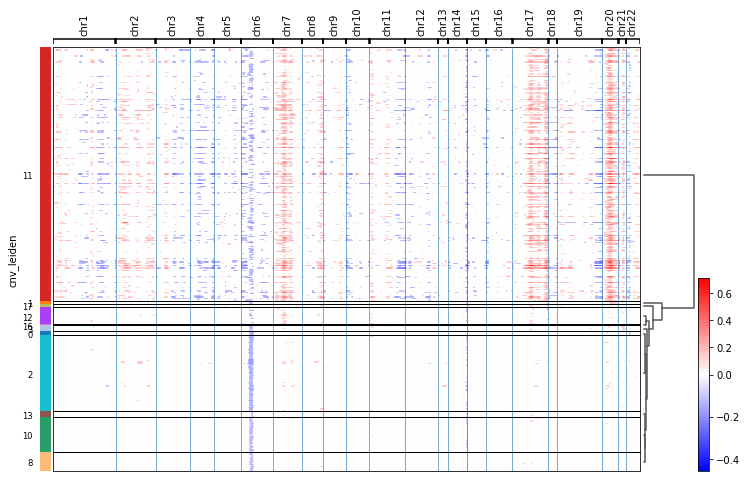

In [16]:
cnv.pl.chromosome_heatmap(
    a[a.obs["Patient"]=="PAT74143",:],
    groupby="cnv_leiden",
    dendrogram=True,
    figsize=(12,8),
)

In [17]:
# define dictionary to remap cnv_leiden
d = {
    "11":"1",
}

pat = "PAT74143"

Mapping new 'CNV clone' values into adata.obs
Plotting CNV heatmap with 'CNV clone' clusters for PAT74143
         Falling back to preprocessing with `sc.pp.pca` and default params.
categories: 1, S
var_group_labels: chr1, chr2, chr3, etc.


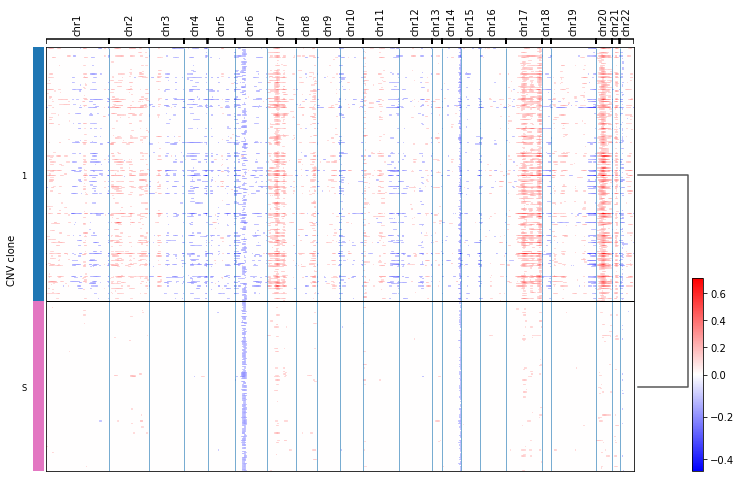

In [18]:
curate_cnv_scRNA(adata=a, pat=pat, d=d, infercnv_dir="scRNA_out/infercnv/")

---
## PAT73458

         Falling back to preprocessing with `sc.pp.pca` and default params.
categories: 10, 12, 13, etc.
var_group_labels: chr1, chr2, chr3, etc.


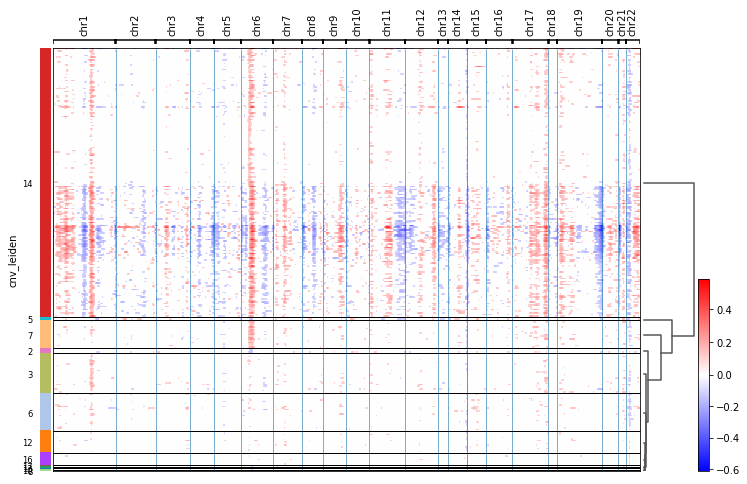

In [19]:
cnv.pl.chromosome_heatmap(
    a[a.obs["Patient"]=="PAT73458",:],
    groupby="cnv_leiden",
    dendrogram=True,
    figsize=(12,8),
)

In [20]:
# define dictionary to remap cnv_leiden
d = {
    "14":"1",
}

pat = "PAT73458"

Mapping new 'CNV clone' values into adata.obs
Plotting CNV heatmap with 'CNV clone' clusters for PAT73458
         Falling back to preprocessing with `sc.pp.pca` and default params.
categories: 1, S
var_group_labels: chr1, chr2, chr3, etc.


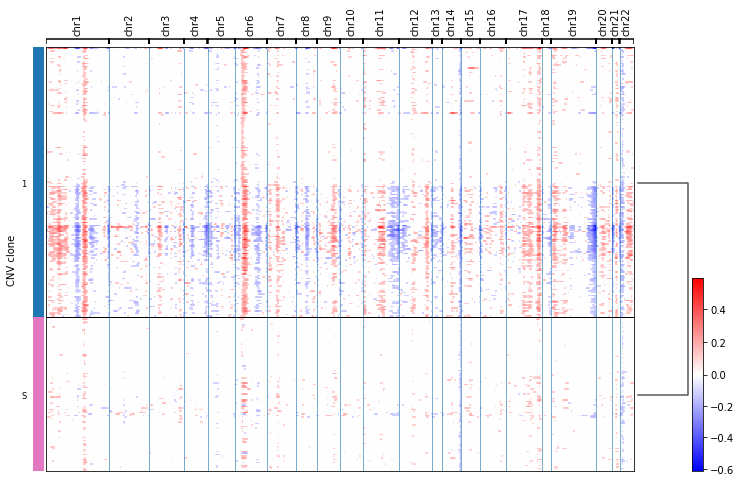

In [21]:
curate_cnv_scRNA(adata=a, pat=pat, d=d, infercnv_dir="scRNA_out/infercnv/")

---
## MAP07862

         Falling back to preprocessing with `sc.pp.pca` and default params.
categories: 0, 10, 12, etc.
var_group_labels: chr1, chr2, chr3, etc.


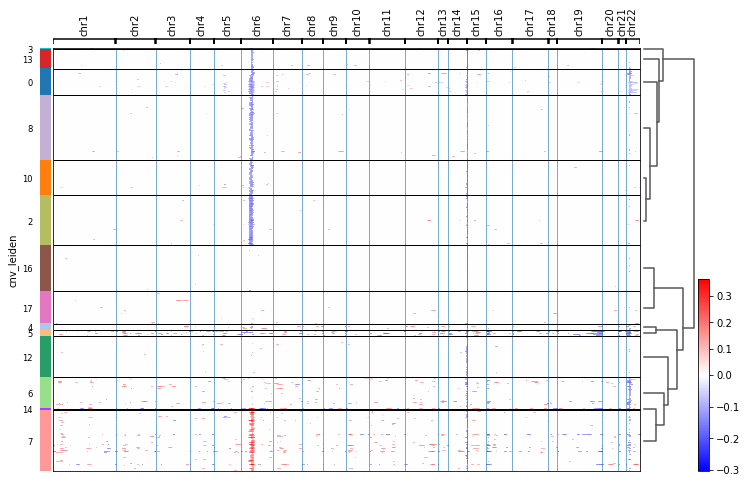

In [23]:
cnv.pl.chromosome_heatmap(
    a[a.obs["Patient"]=="HTA11_07862",:],
    groupby="cnv_leiden",
    dendrogram=True,
    figsize=(12,8),
)

In [26]:
# define dictionary to remap cnv_leiden
d = {
    "5":"2B",
    "4":"2A",
    "7":"1",
}

pat = "HTA11_07862"

Mapping new 'CNV clone' values into adata.obs
Plotting CNV heatmap with 'CNV clone' clusters for HTA11_07862
         Falling back to preprocessing with `sc.pp.pca` and default params.
categories: 1, 2A, 2B, etc.
var_group_labels: chr1, chr2, chr3, etc.


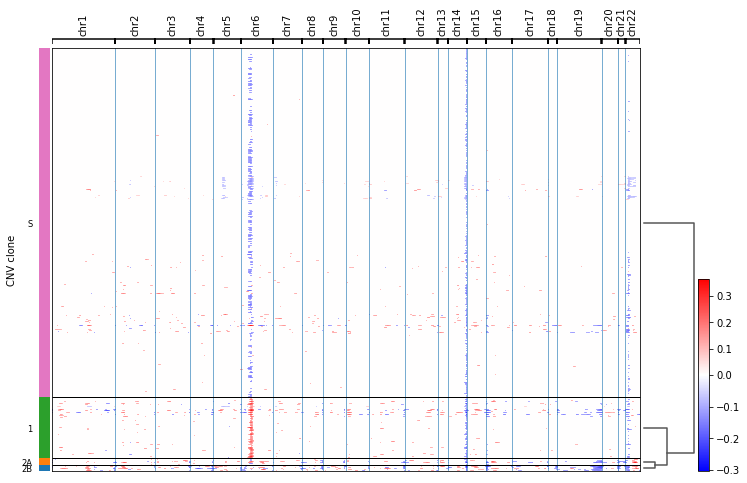

In [27]:
curate_cnv_scRNA(adata=a, pat=pat, d=d, infercnv_dir="scRNA_out/infercnv/")

---
## MAP10711

         Falling back to preprocessing with `sc.pp.pca` and default params.
categories: 0, 10, 11, etc.
var_group_labels: chr1, chr2, chr3, etc.


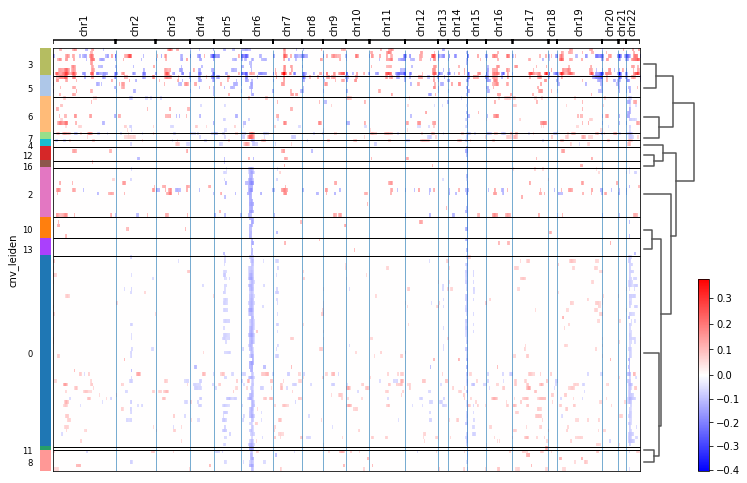

In [28]:
cnv.pl.chromosome_heatmap(
    a[a.obs["Patient"]=="HTA11_10711",:],
    groupby="cnv_leiden",
    dendrogram=True,
    figsize=(12,8),
)

In [29]:
# define dictionary to remap cnv_leiden
d = {
    "3":"1",
}

pat = "HTA11_10711"

Mapping new 'CNV clone' values into adata.obs
Plotting CNV heatmap with 'CNV clone' clusters for HTA11_10711
         Falling back to preprocessing with `sc.pp.pca` and default params.
categories: 1, S
var_group_labels: chr1, chr2, chr3, etc.


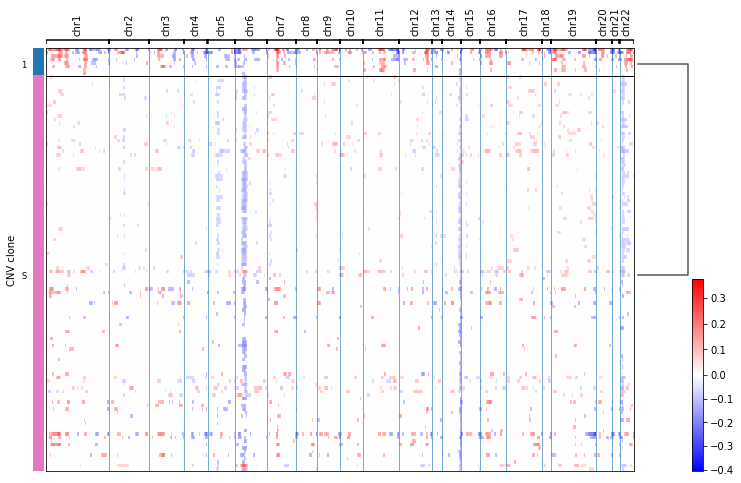

In [30]:
curate_cnv_scRNA(adata=a, pat=pat, d=d, infercnv_dir="scRNA_out/infercnv/")

---
## HTA11_07663

         Falling back to preprocessing with `sc.pp.pca` and default params.
categories: 0, 10, 11, etc.
var_group_labels: chr1, chr2, chr3, etc.


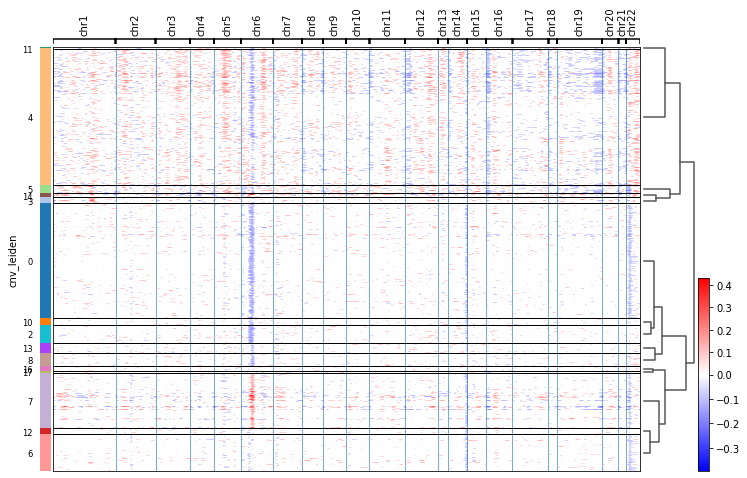

In [31]:
cnv.pl.chromosome_heatmap(
    a[a.obs["Patient"]=="HTA11_07663",:],
    groupby="cnv_leiden",
    dendrogram=True,
    figsize=(12,8),
)

In [32]:
# define dictionary to remap cnv_leiden
d = {
    "4":"2",
    "7":"1",
}

pat = "HTA11_07663"

Mapping new 'CNV clone' values into adata.obs
Plotting CNV heatmap with 'CNV clone' clusters for HTA11_07663
         Falling back to preprocessing with `sc.pp.pca` and default params.
categories: 1, 2, S
var_group_labels: chr1, chr2, chr3, etc.


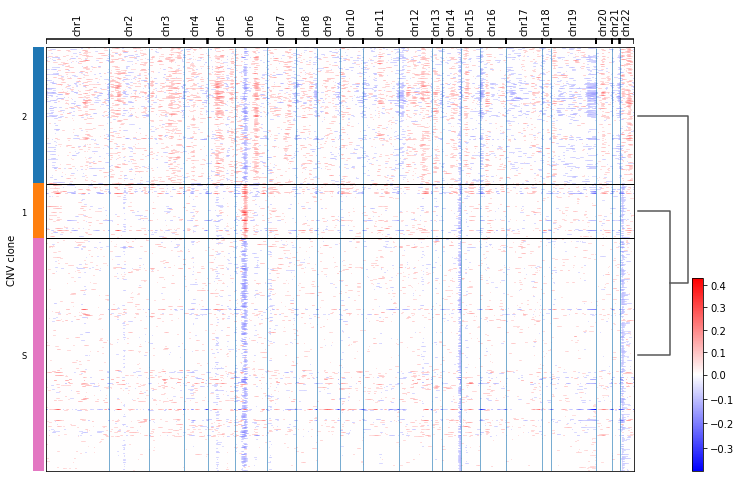

In [33]:
curate_cnv_scRNA(adata=a, pat=pat, d=d, infercnv_dir="scRNA_out/infercnv/")

---
## HTA11_06134

         Falling back to preprocessing with `sc.pp.pca` and default params.
categories: 0, 10, 12, etc.
var_group_labels: chr1, chr2, chr3, etc.


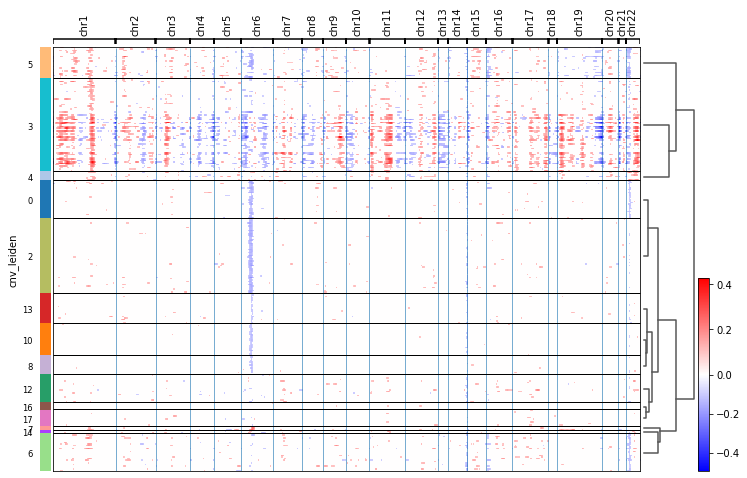

In [34]:
cnv.pl.chromosome_heatmap(
    a[a.obs["Patient"]=="HTA11_06134",:],
    groupby="cnv_leiden",
    dendrogram=True,
    figsize=(12,8),
)

In [35]:
# define dictionary to remap cnv_leiden
d = {
    "5":"1A",
    "3":"1B",
}

pat = "HTA11_06134"

Mapping new 'CNV clone' values into adata.obs
Plotting CNV heatmap with 'CNV clone' clusters for HTA11_06134
         Falling back to preprocessing with `sc.pp.pca` and default params.
categories: 1A, 1B, S
var_group_labels: chr1, chr2, chr3, etc.


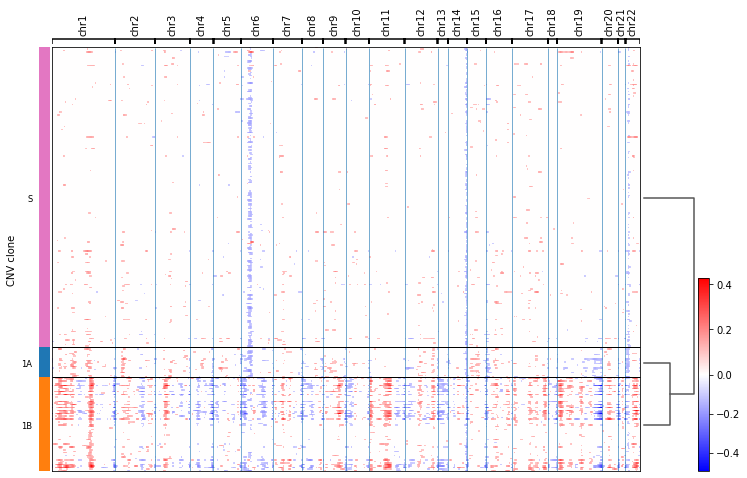

In [36]:
curate_cnv_scRNA(adata=a, pat=pat, d=d, infercnv_dir="scRNA_out/infercnv/")

---
## HTA11_01938

         Falling back to preprocessing with `sc.pp.pca` and default params.
categories: 0, 10, 11, etc.
var_group_labels: chr1, chr2, chr3, etc.


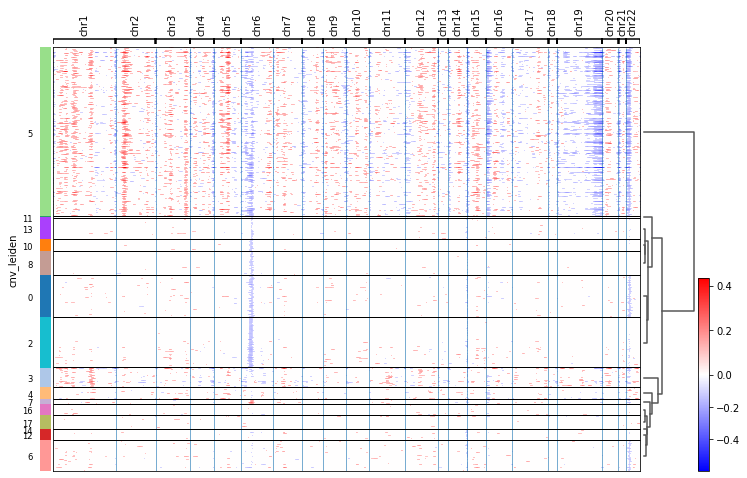

In [37]:
cnv.pl.chromosome_heatmap(
    a[a.obs["Patient"]=="HTA11_01938",:],
    groupby="cnv_leiden",
    dendrogram=True,
    figsize=(12,8),
)

In [38]:
# define dictionary to remap cnv_leiden
d = {
    "5":"1",
}

pat = "HTA11_01938"

Mapping new 'CNV clone' values into adata.obs
Plotting CNV heatmap with 'CNV clone' clusters for HTA11_01938
         Falling back to preprocessing with `sc.pp.pca` and default params.
categories: 1, S
var_group_labels: chr1, chr2, chr3, etc.


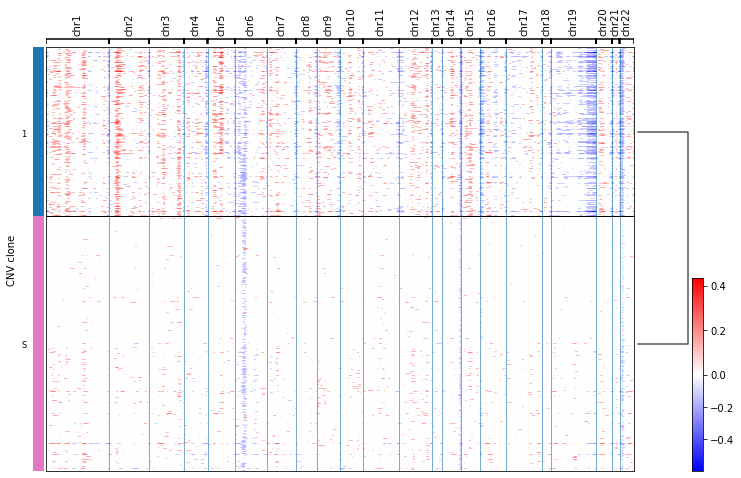

In [39]:
curate_cnv_scRNA(adata=a, pat=pat, d=d, infercnv_dir="scRNA_out/infercnv/")

---
## HTA11_08622

         Falling back to preprocessing with `sc.pp.pca` and default params.
categories: 0, 10, 11, etc.
var_group_labels: chr1, chr2, chr3, etc.


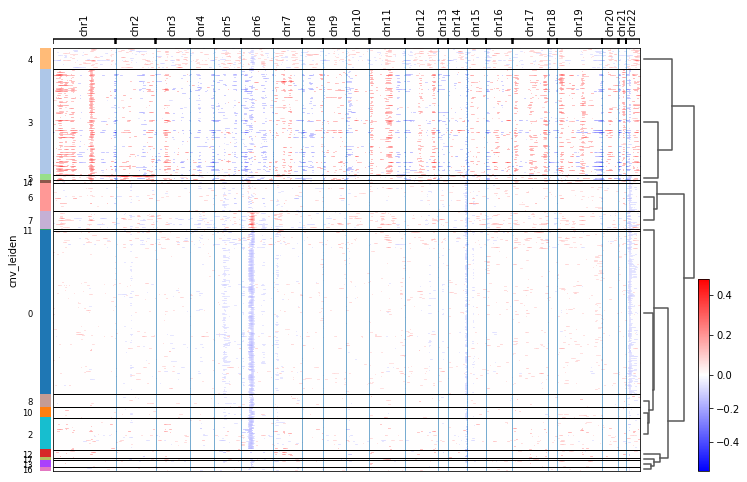

In [40]:
cnv.pl.chromosome_heatmap(
    a[a.obs["Patient"]=="HTA11_08622",:],
    groupby="cnv_leiden",
    dendrogram=True,
    figsize=(12,8),
)

In [41]:
# define dictionary to remap cnv_leiden
d = {
    "7":"1",
    "4":"2A",
    "3":"2B",
}

pat = "HTA11_08622"

Mapping new 'CNV clone' values into adata.obs
Plotting CNV heatmap with 'CNV clone' clusters for HTA11_08622
         Falling back to preprocessing with `sc.pp.pca` and default params.
categories: 1, 2A, 2B, etc.
var_group_labels: chr1, chr2, chr3, etc.


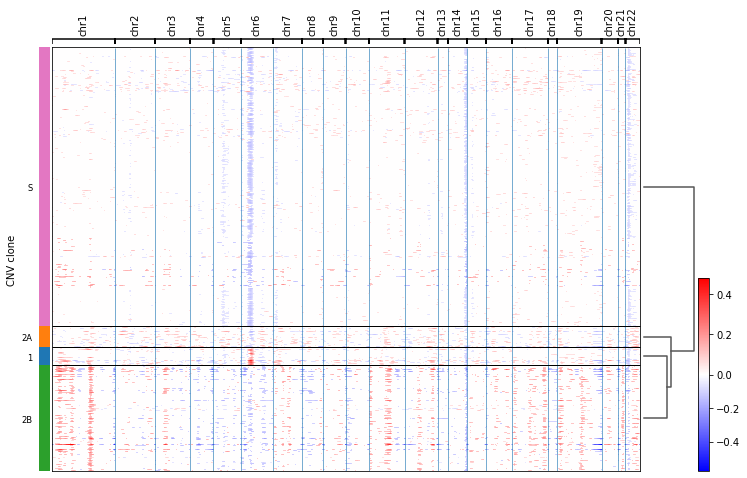

In [42]:
curate_cnv_scRNA(adata=a, pat=pat, d=d, infercnv_dir="scRNA_out/infercnv/")

---
# Save 'CNV Clone' to `.csv` file

In [45]:
a.obs[["cnv_leiden", "cnv_score", "CNV clone"]].to_csv("scRNA_out/infercnv/VUMC_cnv_leiden.csv")